In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.shape

(200, 5)

In [7]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


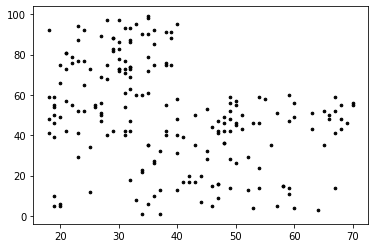

In [8]:
f1=data['Age'].values
f2=data['Spending Score (1-100)'].values
X=np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,color="black",s=7)

In [9]:
from sklearn.cluster import KMeans



# Optimal Clustering

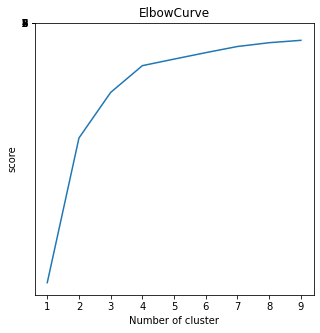

In [14]:
import warnings
warnings.filterwarnings("ignore")
Nc=range(1,10)
kmeans_lst = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans_lst[i].fit(X).score(X) for i in range(len(kmeans_lst))]

plt.figure(figsize=(5,5))
plt.plot(Nc,score)
plt.xlabel("Number of cluster")
plt.ylabel("score")
plt.yticks(Nc)
plt.title("ElbowCurve")
plt.show()

In [13]:
import warnings
warnings.filterwarnings("ignore")

[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]]


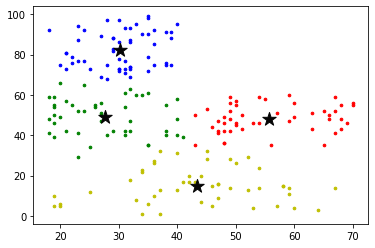

In [12]:
k = 4
X = np.array(list(zip(f1,f2)))
# Number of clusters
kmeans = KMeans(n_clusters=k)
# Fitting the input data
kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.labels_
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print(centroids) # From sci-kit learn
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'r', 'g', 'b', 'y', 'c', 'm', 'r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')